# **Curse of dimensionality**

# `1. Darwin Dataset`

### Data Cleaning

In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy import arange

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from scipy import stats
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

####Load Dataset

In [5]:
# Path untuk dataset
path = "C:/Users/user01/Downloads/Advance Software Engineering/Tugas Paper Kelompok 3/dataset.csv"

# Baca dataset dengan menyediakan encoding yang sesuai
df_dw = pd.read_csv(path, encoding='latin1')  # Atau encoding='windows-1252'


####Show top 10 Data

In [6]:
df_dw.head(10)

,project_name,web_url,data_release,about,languages,watch,fork,star,brances,tags,...,duplication,branch,severity_minor,severity_medium,severity_critical,grade,security.1,performance.1,error_prone,code_style
0,pytorch / vision,Releases · pytorch/vision (github.com),05-Oct-23,"Datasets, Transforms and Models specific to Co...",Python,398,6800,14800,108,113,...,31%,1,882,506,50,A,108,5,1,1324
1,opencv,opencv/opencv: Open Source Computer Vision Lib...,04-Jul-13,Open Source Computer Vision Library,C++,2700,55700,72400,6,123,...,28%,1,11843,1941,608,A,550,233,907,12625
2,mmcv,open-mmlab/mmcv: OpenMMLab Computer Vision Fou...,03-Aug-20,OpenMMLab Computer Vision Foundation,Python,87,1600,5300,10,106,...,32%,1,349,68,29,A,16,30,16,384
3,AliceVision,alicevision/AliceVision: Photogrammetric Compu...,09-Aug-18,Photogrammetric Computer Vision Framework,C++,133,770,2700,121,22,...,35%,1,832,638,15,A,54,22,37,1372
4,computervision-recipes,microsoft/computervision-recipes: Best Practic...,01-Oct-19,"Best Practices, code samples, and documentatio...",Jupyter Notebook,288,1200,9200,28,3,...,16%,1,2390,1292,87,B,83,0,30,3656
5,ccv,liuliu/ccv: C-based/Cached/Core Computer Visio...,2013,"C-based/Cached/Core Computer Vision Library, A...",C,354,1800,7000,11,0,...,51%,1,979,434,15,A,83,2,105,1238
6,computer-vision,khanhnamle1994/computer-vision: Programming As...,03-Apr-17,Programming Assignments and Lectures for Stanf...,Jupyter Notebook,28,250,476,1,0,...,22%,1,427,229,12,B,5,0,11,654
7,kornia,kornia/kornia: Geometric Computer Vision Libra...,03-Oct-18,Geometric Computer Vision Library for AI,Python,125,902,8800,13,41,...,40%,1,895,176,8,B,6,0,7,1066
8,supervision,roboflow/supervision: We write your reusable c...,19-Jan-23,We write your reusable computer vision tools.,Python,69,501,7000,67,31,...,12%,1,93,25,1,B,2,0,0,119
9,tracking.js,eduardolundgren/tracking.js: A modern approach...,16-Jul-14,A modern approach for Computer Vision on the web,JavaScript,290,1500,9400,4,6,...,8%,1,632,403,93,C,415,0,94,619


In [7]:
df_dw.shape

(30, 40)

In [8]:
df_dw.groupby('class').describe()

watch                                                              fork  \
      count    mean         std     min     25%     50%     75%     max count   
class                                                                           
0       2.0   162.0  181.019336    34.0    98.0   162.0   226.0   290.0   2.0   
6       1.0   398.0         NaN   398.0   398.0   398.0   398.0   398.0   1.0   
7       1.0   117.0         NaN   117.0   117.0   117.0   117.0   117.0   1.0   
12      1.0    28.0         NaN    28.0    28.0    28.0    28.0    28.0   1.0   
17      1.0   100.0         NaN   100.0   100.0   100.0   100.0   100.0   1.0   
26      1.0   166.0         NaN   166.0   166.0   166.0   166.0   166.0   1.0   
28      1.0   151.0         NaN   151.0   151.0   151.0   151.0   151.0   1.0   
43      1.0    43.0         NaN    43.0    43.0    43.0    43.0    43.0   1.0   
48      1.0    69.0         NaN    69.0    69.0    69.0    69.0    69.0   1.0   
54      1.0   130.0         NaN   130.0   130.0   130.0   130.0   130.0   1.0   
64      1.0   288.0         NaN   288.0   288.0   288.0   288.0   288.0   1.0   
101     1.0    20.0         NaN    20.0    20.0    20.0    20.0    20.0   1.0   
142     1.0   288.0         NaN   288.0   288.0   288.0   288.0   288.0   1.0   
252     1.0   157.0         NaN   157.0   157.0   157.0   157.0   157.0   1.0   
317     1.0    32.0         NaN    32.0    32.0    32.0    32.0    32.0   1.0   
575     1.0    36.0         NaN    36.0    36.0    36.0    36.0    36.0   1.0   
619     1.0    87.0         NaN    87.0    87.0    87.0    87.0    87.0   1.0   
703     1.0   133.0         NaN   133.0   133.0   133.0   133.0   133.0   1.0   
1092    1.0   125.0         NaN   125.0   125.0   125.0   125.0   125.0   1.0   
1107    1.0    30.0         NaN    30.0    30.0    30.0    30.0    30.0   1.0   
1157    1.0    42.0         NaN    42.0    42.0    42.0    42.0    42.0   1.0   
1173    1.0    40.0         NaN    40.0    40.0    40.0    40.0    40.0   1.0   
1416    1.0    52.0         NaN    52.0    52.0    52.0    52.0    52.0   1.0   
1678    1.0   354.0         NaN   354.0   354.0   354.0   354.0   354.0   1.0   
1712    1.0    50.0         NaN    50.0    50.0    50.0    50.0    50.0   1.0   
3735    1.0   235.0         NaN   235.0   235.0   235.0   235.0   235.0   1.0   
6254    1.0    70.0         NaN    70.0    70.0    70.0    70.0    70.0   1.0   
7317    1.0   274.0         NaN   274.0   274.0   274.0   274.0   274.0   1.0   
18374   1.0  2700.0         NaN  2700.0  2700.0  2700.0  2700.0  2700.0   1.0   

                ... error_prone        code_style                       \
          mean  ...         75%    max      count     mean         std   
class           ...                                                      
0       1161.5  ...        70.5   94.0        2.0    393.5  318.905158   
6       6800.0  ...         1.0    1.0        1.0   1324.0         NaN   
7        473.0  ...         5.0    5.0        1.0    163.0         NaN   
12       250.0  ...        11.0   11.0        1.0    654.0         NaN   
17       473.0  ...         0.0    0.0        1.0    857.0         NaN   
26       708.0  ...         0.0    0.0        1.0    614.0         NaN   
28       870.0  ...         2.0    2.0        1.0    163.0         NaN   
43      1400.0  ...         0.0    0.0        1.0     99.0         NaN   
48       501.0  ...         0.0    0.0        1.0    119.0         NaN   
54       410.0  ...         2.0    2.0        1.0    141.0         NaN   
64      2100.0  ...         0.0    0.0        1.0   1162.0         NaN   
101      172.0  ...         4.0    4.0        1.0    379.0         NaN   
142     1200.0  ...        30.0   30.0        1.0   3656.0         NaN   
252      652.0  ...         6.0    6.0        1.0    327.0         NaN   
317      194.0  ...         0.0    0.0        1.0    402.0         NaN   
575      353.0  ...         0.0    0.0        1.0   8322.0         NaN   
619    

In [9]:
df_dw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   project_name       30 non-null     object
 1   web_url            30 non-null     object
 2   data_release       30 non-null     object
 3   about              30 non-null     object
 4   languages          30 non-null     object
 5   watch              30 non-null     int64 
 6   fork               30 non-null     int64 
 7   star               30 non-null     int64 
 8   brances            30 non-null     int64 
 9   tags               30 non-null     int64 
 10  issue              30 non-null     int64 
 11  pull_request       30 non-null     int64 
 12  file               30 non-null     int64 
 13  total_lines        30 non-null     int64 
 14  line_code          30 non-null     int64 
 15  line_comment       30 non-null     int64 
 16  line_blank         30 non-null     int64 
 17 

#### Removing unneeded column

In [12]:
#df_dw.drop('ID', axis=1, inplace=True)

KeyError: "['ID'] not found in axis"

In [ ]:
df_dw.head(10)

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P
5,1920,0.000011,199.764957,109.902254,1548,6260,0.212523,0.143013,154.833606,0.028369,...,0.131135,0.018907,3.643543,1.667827,76,43790,1081.054579,152045.4446,74605,P
6,6415,0.000012,276.514601,279.725410,1837,13414,0.678487,0.193239,278.120005,0.121922,...,0.139827,0.021473,4.408127,3.461721,131,42515,1927.908032,110278.7889,187490,P
7,1510,0.000007,284.015654,154.783882,2883,4663,0.668661,0.168026,219.399768,0.123317,...,0.100256,0.024975,4.086628,3.047974,57,27660,1783.093999,183403.1459,40345,P
8,4860,0.000013,236.876312,308.575985,3171,7348,0.277021,0.214148,272.726149,0.040834,...,0.043534,0.021311,3.926618,3.026629,102,64740,1253.154541,193816.2765,108925,P
9,6265,0.000013,381.928872,354.110090,5568,12313,1.279171,0.193084,368.019481,0.234314,...,0.225087,0.019499,6.371888,3.659526,76,65600,1696.218826,169562.1039,166635,P


#### Identify Columns That Null Value and Remove Null Value

In [ ]:
# Check for null values in the entire dataset
null_counts = df_dw.isnull().sum()

# Display columns with null values and their counts
print("Columns with null values:")
print(null_counts[null_counts > 0])

if len(null_counts[null_counts > 0]) != 0 :
  # Remove rows with any null values
  df_dw = df_dw.dropna()

Columns with null values:
Series([], dtype: int64)


 #### Identify Columns That Contain a Single Value

In [ ]:
#checking for quasi constants
df_dw.nunique()

air_time1           165
disp_index1         131
gmrt_in_air1        174
gmrt_on_paper1      174
max_x_extension1    167
                   ... 
paper_time25        159
pressure_mean25     161
pressure_var25      161
total_time25        161
class                 2
Length: 451, dtype: int64

 #### Delete Columns That Contain a Single Value

In [ ]:
print(df_dw.shape)
# get number of unique values for each column
counts = df_dw.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(df_dw.columns[to_del])
# drop useless columns
df_dw.drop(to_del, axis=1, inplace=True)
print(df_dw.shape)

(174, 451)
Index([], dtype='object')
(174, 451)


#### Identify Rows That Contain Duplicate Data and Delete Rows

In [ ]:
# calculate duplicates
dups = df_dw.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df_dw[dups])
if dups.any() == True:
  df_dw.drop_duplicates(inplace=True)
  print(df_dw.shape)


False
Empty DataFrame
Columns: [air_time1, disp_index1, gmrt_in_air1, gmrt_on_paper1, max_x_extension1, max_y_extension1, mean_acc_in_air1, mean_acc_on_paper1, mean_gmrt1, mean_jerk_in_air1, mean_jerk_on_paper1, mean_speed_in_air1, mean_speed_on_paper1, num_of_pendown1, paper_time1, pressure_mean1, pressure_var1, total_time1, air_time2, disp_index2, gmrt_in_air2, gmrt_on_paper2, max_x_extension2, max_y_extension2, mean_acc_in_air2, mean_acc_on_paper2, mean_gmrt2, mean_jerk_in_air2, mean_jerk_on_paper2, mean_speed_in_air2, mean_speed_on_paper2, num_of_pendown2, paper_time2, pressure_mean2, pressure_var2, total_time2, air_time3, disp_index3, gmrt_in_air3, gmrt_on_paper3, max_x_extension3, max_y_extension3, mean_acc_in_air3, mean_acc_on_paper3, mean_gmrt3, mean_jerk_in_air3, mean_jerk_on_paper3, mean_speed_in_air3, mean_speed_on_paper3, num_of_pendown3, paper_time3, pressure_mean3, pressure_var3, total_time3, air_time4, disp_index4, gmrt_in_air4, gmrt_on_paper4, max_x_extension4, max_y_ex

####Consider Columns That Have Very Few Values

In [ ]:
# summarize the number of unique values in each column
for i in range(df_dw.shape[1]):
  num = len(df_dw.iloc[:, i].unique())
  percentage = float(num) / df_dw.shape[0] * 100
  if percentage < 1:
    print('%d, %d, %.1f%%' % (i, num, percentage))

In [ ]:
print(df_dw.shape)
# get number of unique values for each column
counts = df_dw.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df_dw.shape[0]*100) < 1]
print(df_dw.columns[to_del])
# drop useless columns
df_dw.drop(to_del, axis=1, inplace=True)
print(df_dw.shape)

(174, 451)
Index([], dtype='object')
(174, 451)


### Plot Histogram

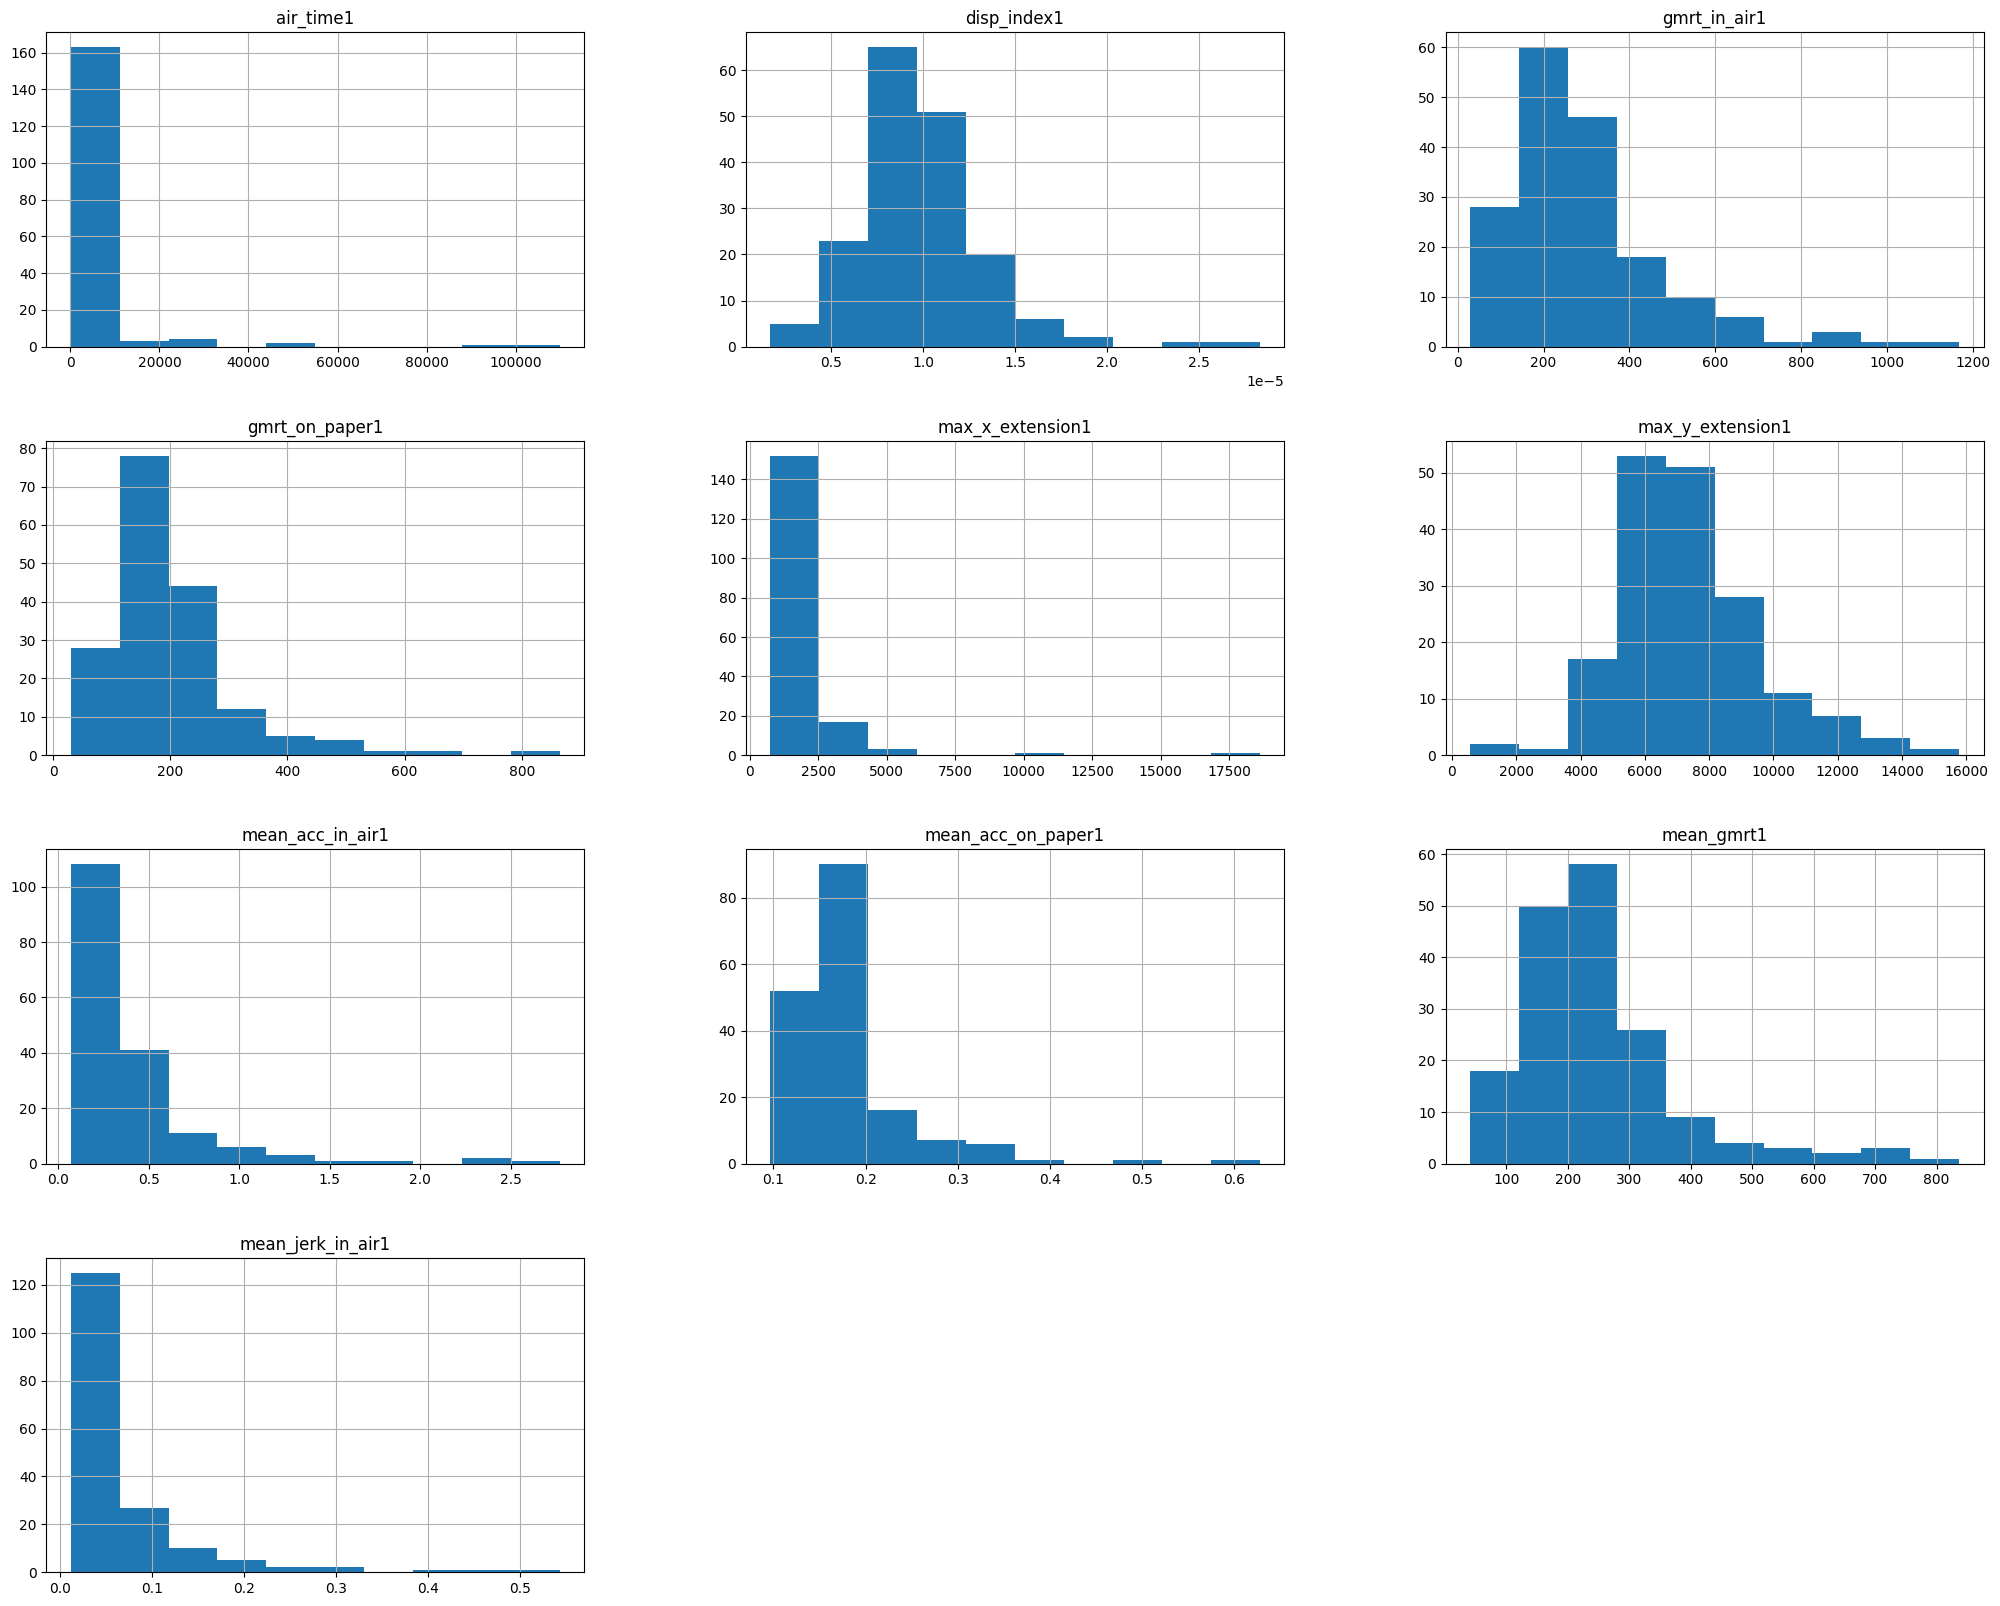

In [ ]:
selected_columns = df_dw.iloc[:, :10]

# selected_columns = df_dw.iloc[:, :-2]
selected_columns.hist(bins=10, linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(25,20)
plt.show()

### Splitting The Data into Training And Testing Dataset

In [ ]:
# retrieve numpy array
dataset = df_dw.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

# Normalisasi
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

###Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
k_best = 10  # Choose the number of top features to select

#### ANOVA F-test Features

Number of selected features ANOVA: 10
Selected features ANOVA : ['gmrt_in_air7', 'mean_gmrt7', 'mean_speed_in_air7', 'paper_time9', 'total_time9', 'total_time13', 'paper_time15', 'air_time16', 'disp_index22', 'disp_index23']


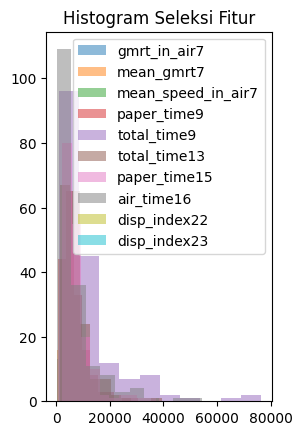

In [ ]:
# Create SelectKBest object using chi2 as the score function
best_features_anova = SelectKBest(score_func=f_classif, k=k_best).fit(X_train, y_train)
selected_features_indices = best_features_anova.get_support(indices=True)

# Get the selected column names
selected_column_names = [df_dw.columns[i] for i in selected_features_indices]

print(f"Number of selected features ANOVA: {len(selected_column_names)}")
print(f"Selected features ANOVA : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df_dw[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [ ]:
X_train_selected_anova = best_features_anova.transform(X_train)
X_test_selected_anova = best_features_anova.transform(X_test)

In [ ]:
# Display the shape of the dataset before and after feature selection
print("Shape of original dataset:", X_train.shape)
print("Shape after feature selection:", X_train_selected_anova.shape)

Shape of original dataset: (139, 450)
Shape after feature selection: (139, 10)


In [ ]:
df_dw.columns

Index(['air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1',
       'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1',
       'mean_acc_on_paper1', 'mean_gmrt1', 'mean_jerk_in_air1',
       ...
       'mean_jerk_in_air25', 'mean_jerk_on_paper25', 'mean_speed_in_air25',
       'mean_speed_on_paper25', 'num_of_pendown25', 'paper_time25',
       'pressure_mean25', 'pressure_var25', 'total_time25', 'class'],
      dtype='object', length=451)

#### Univariate Selection

Number of selected features univariate: 10
Selected features univariate : ['mean_gmrt7', 'paper_time7', 'num_of_pendown9', 'air_time13', 'air_time15', 'total_time15', 'air_time16', 'total_time16', 'air_time19', 'total_time19']


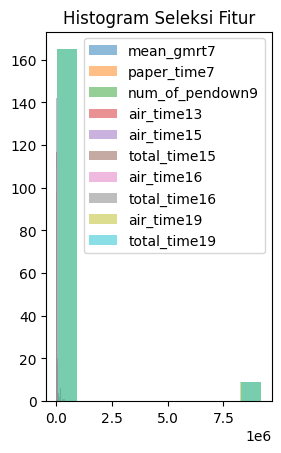

In [ ]:
# Create SelectKBest object using chi2 as the score function
best_features_univariate = SelectKBest(score_func=chi2, k=k_best).fit(X_train, y_train)
selected_features_indices = best_features_univariate.get_support(indices=True)

# Get the selected column names
selected_column_names = [df_dw.columns[i] for i in selected_features_indices]

print(f"Number of selected features univariate: {len(selected_column_names)}")
print(f"Selected features univariate : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df_dw[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [ ]:
X_train_selected_univariate = best_features_univariate.transform(X_train)
X_test_selected_univariate = best_features_univariate.transform(X_test)

#### Recursive Feature Elimination

Number of selected features RFE: 10
Selected features RFE : ['total_time2', 'air_time4', 'pressure_var4', 'paper_time9', 'total_time22', 'air_time23', 'disp_index23', 'paper_time23', 'total_time23', 'disp_index25']


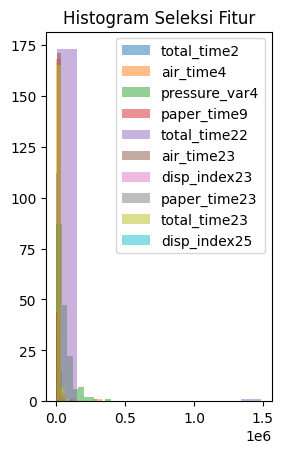

In [ ]:
# best_features_rfe = RFE(estimator=ExtraTreesClassifier(n_estimators=100), n_features_to_select=k_best)
# best_features_rfe.fit(X_train, y_train)
# selected_features_indices = best_features_rfe.get_support(indices=True)

# # Get the selected column names
# selected_column_names = [df_dw.columns[i] for i in selected_features_indices]

# print(f"Number of selected features RFE: {len(selected_column_names)}")
# print(f"Selected features RFE : {list(selected_column_names)}")

# plt.subplot(1, 2, 2)
# for feature in selected_column_names:
#     plt.hist(df_dw[feature], bins=10, alpha=0.5, label=feature)
#     plt.title('Histogram Seleksi Fitur')
#     plt.legend()

# plt.show()

# Inisialisasi RFE dengan model dan jumlah fitur yang diinginkan
best_features_rfe = RFE(RandomForestClassifier(n_estimators=5, random_state=42), n_features_to_select=k_best, step=50)  # Sesuaikan parameter
best_features_rfe.fit(X_train, y_train)
selected_features_indices = best_features_rfe.get_support(indices=True)

# Get the selected column names
selected_column_names = [df_dw.columns[i] for i in selected_features_indices]

print(f"Number of selected features RFE: {len(selected_column_names)}")
print(f"Selected features RFE : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df_dw[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [ ]:
X_train_selected_rfe = best_features_rfe.transform(X_train)
X_test_selected_rfe = best_features_rfe.transform(X_test)

### Dimensionality Reduction

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Principal Component Analysis - PCA

In [ ]:
# Dimensionality Reduction with PCA for all feature
print("Dimensionality Reduction with PCA for all feature")
n_components = 5
pca = PCA(n_components=n_components)
X_train_reduced_pca = pca.fit_transform(X_train)
X_test_reduced_pca = pca.transform(X_test)

Dimensionality Reduction with PCA for all feature


#### Linear Discriminant Analysis - LDA

In [ ]:
# Dimensionality Reduction with LDA for all feature
print("Dimensionality Reduction with LDA for all feature")
n_components = 1
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_reduced_lda = lda.fit_transform(X_train, y_train)
X_test_reduced_lda = lda.transform(X_test)

Dimensionality Reduction with LDA for all feature


### Uji metode tersebut dengan sedikitnya 5 Klasifikasi

In [ ]:
# evaluation of a model using 4 features chosen with anova f-test
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # for checking the model accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn import model_selection
# Define stratified k-fold cross-validation with 10 splits
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
scoring = 'accuracy'

####Logistic Regresion

In [ ]:
# fit the model with all feature
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 88.57


In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

Evaluate model with feature selection
Accuracy with feature selection ANOVA: 71.43
Accuracy with feature selection Univariate Selection: 80.00
Accuracy with feature selection Recursive Feature Elimination: 80.00


In [ ]:
# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection ANOVA:", accuracy)

Best Hyperparameters with feature selection ANOVA: {'C': 100, 'solver': 'saga'}
Best score accuracy for Logistic Regression hyperparameter tuning with feature selection ANOVA: 80.0


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection Univariate:", accuracy)

Best Hyperparameters with feature selection Univariate: {'C': 100, 'solver': 'newton-cg'}
Best score accuracy for Logistic Regression hyperparameter tuning with feature selection Univariate: 85.71


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection RFE:", accuracy)

Best Hyperparameters with feature selection RFE: {'C': 100, 'solver': 'saga'}
Best score accuracy for Logistic Regression hyperparameter tuning with feature selection RFE: 80.0


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction PCA:", accuracy)

Best Hyperparameters with feature reduction PCA: {'C': 1, 'solver': 'liblinear'}
Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction PCA: 85.71


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction LDA:", accuracy)

Best Hyperparameters with feature reduction LDA: {'C': 0.001, 'solver': 'liblinear'}
Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction LDA: 71.43


####Decision Tree

In [ ]:
# fit the model with all feature
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 88.57


In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

Evaluate model with feature selection
Accuracy with feature selection ANOVA: 71.43
Accuracy with feature selection Univariate Selection: 71.43
Accuracy with feature selection Recursive Feature Elimination: 94.29


In [ ]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 10, 50, 100]
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection ANOVA:", accuracy)

Best Hyperparameters with feature selection ANOVA: {'max_depth': 10, 'min_samples_split': 10}
Best score accuracy for Decision Tree hyperparameter tuning with feature selection ANOVA: 74.29


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection Univariate:", accuracy)

Best Hyperparameters with feature selection Univariate: {'max_depth': 10, 'min_samples_split': 10}
Best score accuracy for Decision Tree hyperparameter tuning with feature selection Univariate: 68.57


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection RFE:", accuracy)

Best Hyperparameters with feature selection RFE: {'max_depth': None, 'min_samples_split': 2}
Best score accuracy for Decision Tree hyperparameter tuning with feature selection RFE: 88.57


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature reduction PCA:", accuracy)

Best Hyperparameters with feature reduction PCA: {'max_depth': 10, 'min_samples_split': 10}
Best score accuracy for Decision Tree hyperparameter tuning with feature reduction PCA: 88.57


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature reduction LDA:", accuracy)

Best Hyperparameters with feature reduction LDA: {'max_depth': 10, 'min_samples_split': 2}
Best score accuracy for Decision Tree hyperparameter tuning with feature reduction LDA: 71.43


####Support Vector Machine

In [ ]:
# fit the model with all feature
model = SVC()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 85.71


In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

Evaluate model with feature selection
Accuracy with feature selection ANOVA: 77.14
Accuracy with feature selection Univariate Selection: 85.71
Accuracy with feature selection Recursive Feature Elimination: 80.00


In [ ]:
# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'auto']
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection ANOVA:", accuracy)

Best Hyperparameters with feature selection ANOVA: {'C': 10, 'gamma': 1}
Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection ANOVA: 77.14


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection Univariate:", accuracy)

Best Hyperparameters with feature selection Univariate: {'C': 10, 'gamma': 0.1}
Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection Univariate: 85.71


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection RFE:", accuracy)

Best Hyperparameters with feature selection RFE: {'C': 10, 'gamma': 1}
Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection RFE: 82.86


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction PCA:", accuracy)

Best Hyperparameters with feature reduction PCA: {'C': 1, 'gamma': 0.1}
Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction PCA: 88.57


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction LDA:", accuracy)

Best Hyperparameters with feature reduction LDA: {'C': 0.1, 'gamma': 0.1}
Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction LDA: 71.43


####K-Nearest Neighbors

In [ ]:
# fit the model with all feature
model = KNeighborsClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 65.71


In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

Evaluate model with feature selection
Accuracy with feature selection ANOVA: 74.29
Accuracy with feature selection Univariate Selection: 77.14
Accuracy with feature selection Recursive Feature Elimination: 80.00


In [ ]:
# Define hyperparameter
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection ANOVA:", accuracy)

Best Hyperparameters with feature selection ANOVA: {'n_neighbors': 5, 'weights': 'distance'}
Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection ANOVA: 74.29


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection Univariate:", accuracy)

Best Hyperparameters with feature selection Univariate: {'n_neighbors': 5, 'weights': 'distance'}
Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection Univariate: 77.14


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection RFE:", accuracy)

Best Hyperparameters with feature selection RFE: {'n_neighbors': 7, 'weights': 'uniform'}
Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection RFE: 80.0


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction PCA:", accuracy)

Best Hyperparameters with feature reduction PCA: {'n_neighbors': 9, 'weights': 'uniform'}
Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction PCA: 88.57


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction LDA:", accuracy)

Best Hyperparameters with feature reduction LDA: {'n_neighbors': 3, 'weights': 'uniform'}
Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction LDA: 71.43


####Random Forest

In [ ]:
# fit the model with all feature
model = RandomForestClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

Accuracy with all feature: 88.57


In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

Evaluate model with feature selection
Accuracy with feature selection ANOVA: 85.71
Accuracy with feature selection Univariate Selection: 82.86
Accuracy with feature selection Recursive Feature Elimination: 80.00


In [ ]:
# Define hyperparameter
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection ANOVA:", accuracy)

Best Hyperparameters with feature selection ANOVA: {'max_depth': None, 'n_estimators': 100}
Best score accuracy for Random Forest hyperparameter tuning with feature selection ANOVA: 82.86


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection Univariate:", accuracy)

Best Hyperparameters with feature selection Univariate: {'max_depth': 20, 'n_estimators': 50}
Best score accuracy for Random Forest hyperparameter tuning with feature selection Univariate: 85.71


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection RFE:", accuracy)

Best Hyperparameters with feature selection RFE: {'max_depth': None, 'n_estimators': 50}
Best score accuracy for Random Forest hyperparameter tuning with feature selection RFE: 85.71


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature reduction PCA:", accuracy)

Best Hyperparameters with feature reduction PCA: {'max_depth': 20, 'n_estimators': 200}
Best score accuracy for Random Forest hyperparameter tuning with feature reduction PCA: 88.57


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature reduction LDA:", accuracy)

Best Hyperparameters with feature reduction LDA: {'max_depth': None, 'n_estimators': 50}
Best score accuracy for Random Forest hyperparameter tuning with feature reduction LDA: 71.43


# `2. Toxicity Dataset`

### Data Cleaning

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy import arange

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

####Load Dataset

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Dataset/"
df_tc = pd.read_csv(path +'Toxicity/toxicity.csv')

####Show top 10 Data

In [ ]:
df_tc.head(10)

In [ ]:
df_tc.shape

In [ ]:
df_tc.groupby('Class').describe()

In [ ]:
df_tc.info()

#### Identify Columns That Null Value and Remove Null Value

In [ ]:
# Check for null values in the entire dataset
null_counts = df_tc.isnull().sum()

# Display columns with null values and their counts
print("Columns with null values:")
print(null_counts[null_counts > 0])

if len(null_counts[null_counts > 0]) != 0 :
  # Remove rows with any null values
  df_tc = df_tc.dropna()

 #### Identify Columns That Contain a Single Value

In [ ]:
#checking for quasi constants
df_tc.nunique()

 #### Delete Columns That Contain a Single Value

In [ ]:
print(df_tc.shape)
# get number of unique values for each column
counts = df_tc.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(df_tc.columns[to_del])
# drop useless columns
df_tc.drop(to_del, axis=1, inplace=True)
print(df_tc.shape)

#### Identify Rows That Contain Duplicate Data and Delete Rows

In [ ]:
# calculate duplicates
dups = df_tc.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df_tc[dups])
if dups.any() == True:
  df_tc.drop_duplicates(inplace=True)
  print(df_tc.shape)


####Consider Columns That Have Very Few Values

In [ ]:
# summarize the number of unique values in each column
for i in range(df_tc.shape[1]):
  num = len(df_tc.iloc[:, i].unique())
  percentage = float(num) / df_tc.shape[0] * 100
  if percentage < 1:
    print('%d, %d, %.1f%%' % (i, num, percentage))

In [ ]:
print(df_tc.shape)
# get number of unique values for each column
counts = df_tc.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df_tc.shape[0]*100) < 1]
print(df_tc.columns[to_del])
# drop useless columns
df_tc.drop(to_del, axis=1, inplace=True)
print(df_tc.shape)

### Plot Histogram

In [ ]:
selected_columns = df_tc.iloc[:, :10]

# selected_columns = df_tc.iloc[:, :-2]
selected_columns.hist(bins=10, linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(25,20)
plt.show()

### Splitting The Data into Training And Testing Dataset

In [ ]:
# retrieve numpy array
dataset = df_tc.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

# Normalisasi
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

###Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
k_best = 10  # Choose the number of top features to select

#### ANOVA F-test Features

In [ ]:
# Create SelectKBest object using chi2 as the score function
best_features_anova = SelectKBest(score_func=f_classif, k=k_best).fit(X_train, y_train)
selected_features_indices = best_features_anova.get_support(indices=True)

# Get the selected column names
selected_column_names = [df_tc.columns[i] for i in selected_features_indices]

print(f"Number of selected features ANOVA: {len(selected_column_names)}")
print(f"Selected features ANOVA : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df_tc[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [ ]:
X_train_selected_anova = best_features_anova.transform(X_train)
X_test_selected_anova = best_features_anova.transform(X_test)

In [ ]:
# Display the shape of the dataset before and after feature selection
print("Shape of original dataset:", X_train.shape)
print("Shape after feature selection:", X_train_selected_anova.shape)

In [ ]:
df_tc.columns

#### Univariate Selection

In [ ]:
# Create SelectKBest object using chi2 as the score function
best_features_univariate = SelectKBest(score_func=chi2, k=k_best).fit(X_train, y_train)
selected_features_indices = best_features_univariate.get_support(indices=True)

# Get the selected column names
selected_column_names = [df_tc.columns[i] for i in selected_features_indices]

print(f"Number of selected features univariate: {len(selected_column_names)}")
print(f"Selected features univariate : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df_tc[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [ ]:
X_train_selected_univariate = best_features_univariate.transform(X_train)
X_test_selected_univariate = best_features_univariate.transform(X_test)

#### Recursive Feature Elimination

In [ ]:
# Inisialisasi RFE dengan model dan jumlah fitur yang diinginkan
best_features_rfe = RFE(RandomForestClassifier(n_estimators=5, random_state=42), n_features_to_select=k_best, step=50)  # Sesuaikan parameter
best_features_rfe.fit(X_train, y_train)
selected_features_indices = best_features_rfe.get_support(indices=True)

# Get the selected column names
selected_column_names = [df_tc.columns[i] for i in selected_features_indices]

print(f"Number of selected features RFE: {len(selected_column_names)}")
print(f"Selected features RFE : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df_tc[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [ ]:
X_train_selected_rfe = best_features_rfe.transform(X_train)
X_test_selected_rfe = best_features_rfe.transform(X_test)

### Dimensionality Reduction

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Principal Component Analysis - PCA

In [ ]:
# Dimensionality Reduction with PCA for all feature
print("Dimensionality Reduction with PCA for all feature")
n_components = 5
pca = PCA(n_components=n_components)
X_train_reduced_pca = pca.fit_transform(X_train)
X_test_reduced_pca = pca.transform(X_test)

#### Linear Discriminant Analysis - LDA

In [ ]:
# Dimensionality Reduction with LDA for all feature
print("Dimensionality Reduction with LDA for all feature")
n_components = 1
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_reduced_lda = lda.fit_transform(X_train, y_train)
X_test_reduced_lda = lda.transform(X_test)

### Uji metode tersebut dengan sedikitnya 5 Klasifikasi

In [ ]:
# evaluation of a model using 4 features chosen with anova f-test
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # for checking the model accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn import model_selection
# Define stratified k-fold cross-validation with 10 splits
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
scoring = 'accuracy'

####Logistic Regresion

In [ ]:
# fit the model with all feature
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

In [ ]:
# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection ANOVA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection Univariate:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection RFE:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction PCA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction LDA:", accuracy)

####Decision Tree

In [ ]:
# fit the model with all feature
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

In [ ]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 10, 50, 100]
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection ANOVA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection Univariate:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection RFE:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature reduction PCA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature reduction LDA:", accuracy)

####Support Vector Machine

In [ ]:
# fit the model with all feature
model = SVC()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

In [ ]:
# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'auto']
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection ANOVA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection Univariate:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection RFE:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction PCA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction LDA:", accuracy)

####K-Nearest Neighbors

In [ ]:
# fit the model with all feature
model = KNeighborsClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

In [ ]:
# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection ANOVA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection Univariate:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection RFE:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction PCA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction LDA:", accuracy)

####Random Forest

In [ ]:
# fit the model with all feature
model = RandomForestClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

In [ ]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection ANOVA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection Univariate:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection RFE:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature reduction PCA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature reduction LDA:", accuracy)

# `3. Gene Expression`

### Data Cleaning

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy import arange

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

####Load Dataset

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Dataset/"
rna_exp = pd.read_csv(path +'Gene Expression/data.csv')
labels = pd.read_csv(path +'Gene Expression/labels.csv')

df_gene = pd.concat([rna_exp, labels], axis=1)

####Show top 10 Data

In [ ]:
df_gene.head(10)

In [ ]:
df_gene.shape

In [ ]:
df_gene.groupby('Class').describe()

In [ ]:
df_gene.info()

#### Removing unneeded column

In [ ]:
df_gene.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_gene.head(10)

#### Identify Columns That Null Value and Remove Null Value

In [ ]:
# Check for null values in the entire dataset
null_counts = df_gene.isnull().sum()

# Display columns with null values and their counts
print("Columns with null values:")
print(null_counts[null_counts > 0])

if len(null_counts[null_counts > 0]) != 0 :
  # Remove rows with any null values
  df_gene = df_gene.dropna()

 #### Identify Columns That Contain a Single Value

In [ ]:
#checking for quasi constants
df_gene.nunique()

 #### Delete Columns That Contain a Single Value

In [ ]:
print(df_gene.shape)
# get number of unique values for each column
counts = df_gene.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(df_gene.columns[to_del])
# drop useless columns
df_gene.drop(df_gene.columns[to_del], axis=1, inplace=True)
print(df_gene.shape)

#### Identify Rows That Contain Duplicate Data and Delete Rows

In [ ]:
# calculate duplicates
dups = df_gene.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df_gene[dups])
if dups.any() == True:
  df_gene.drop_duplicates(inplace=True)
  print(df_gene.shape)


####Consider Columns That Have Very Few Values

In [ ]:
# summarize the number of unique values in each column
for i in range(df_gene.shape[1]):
  num = len(df_gene.iloc[:, i].unique())
  percentage = float(num) / df_gene.shape[0] * 100
  if percentage < 1:
    print('%d, %d, %.1f%%' % (i, num, percentage))

In [ ]:
print(df_gene.shape)
# get number of unique values for each column
counts = df_gene.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df_gene.shape[0]*100) < 1]
print(df_gene.columns[to_del])
# drop useless columns
df_gene.drop(df_gene.columns[to_del], axis=1, inplace=True)
print(df_gene.shape)

### Plot Histogram

In [ ]:
selected_columns = df_gene.iloc[:, :10]

# selected_columns = df_gene.iloc[:, :-2]
selected_columns.hist(bins=10, linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(25,20)
plt.show()

### Splitting The Data into Training And Testing Dataset

In [ ]:
# retrieve numpy array
dataset = df_gene.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

# Normalisasi
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

###Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
k_best = 10  # Choose the number of top features to select

#### ANOVA F-test Features

In [ ]:
# Create SelectKBest object using chi2 as the score function
best_features_anova = SelectKBest(score_func=f_classif, k=k_best).fit(X_train, y_train)
selected_features_indices = best_features_anova.get_support(indices=True)

# Get the selected column names
selected_column_names = [df_gene.columns[i] for i in selected_features_indices]

print(f"Number of selected features ANOVA: {len(selected_column_names)}")
print(f"Selected features ANOVA : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df_gene[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [ ]:
X_train_selected_anova = best_features_anova.transform(X_train)
X_test_selected_anova = best_features_anova.transform(X_test)

In [ ]:
# Display the shape of the dataset before and after feature selection
print("Shape of original dataset:", X_train.shape)
print("Shape after feature selection:", X_train_selected_anova.shape)

In [ ]:
df_gene.columns

#### Univariate Selection

In [ ]:
# Create SelectKBest object using chi2 as the score function
best_features_univariate = SelectKBest(score_func=chi2, k=k_best).fit(X_train, y_train)
selected_features_indices = best_features_univariate.get_support(indices=True)

# Get the selected column names
selected_column_names = [df_gene.columns[i] for i in selected_features_indices]

print(f"Number of selected features univariate: {len(selected_column_names)}")
print(f"Selected features univariate : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df_gene[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [ ]:
X_train_selected_univariate = best_features_univariate.transform(X_train)
X_test_selected_univariate = best_features_univariate.transform(X_test)

#### Recursive Feature Elimination

In [ ]:
# Inisialisasi RFE dengan model dan jumlah fitur yang diinginkan
best_features_rfe = RFE(RandomForestClassifier(n_estimators=5, random_state=42), n_features_to_select=k_best, step=50)  # Sesuaikan parameter
best_features_rfe.fit(X_train, y_train)
selected_features_indices = best_features_rfe.get_support(indices=True)

# Get the selected column names
selected_column_names = [df_gene.columns[i] for i in selected_features_indices]

print(f"Number of selected features RFE: {len(selected_column_names)}")
print(f"Selected features RFE : {list(selected_column_names)}")

plt.subplot(1, 2, 2)
for feature in selected_column_names:
    plt.hist(df_gene[feature], bins=10, alpha=0.5, label=feature)
    plt.title('Histogram Seleksi Fitur')
    plt.legend()

plt.show()

In [ ]:
X_train_selected_rfe = best_features_rfe.transform(X_train)
X_test_selected_rfe = best_features_rfe.transform(X_test)

### Dimensionality Reduction

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Principal Component Analysis - PCA

In [ ]:
# Dimensionality Reduction with PCA for all feature
print("Dimensionality Reduction with PCA for all feature")
n_components = 5
pca = PCA(n_components=n_components)
X_train_reduced_pca = pca.fit_transform(X_train)
X_test_reduced_pca = pca.transform(X_test)

#### Linear Discriminant Analysis - LDA

In [ ]:
# Dimensionality Reduction with LDA for all feature
print("Dimensionality Reduction with LDA for all feature")
n_components = 1
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_reduced_lda = lda.fit_transform(X_train, y_train)
X_test_reduced_lda = lda.transform(X_test)

### Uji metode tersebut dengan sedikitnya 5 Klasifikasi

In [ ]:
# evaluation of a model using 4 features chosen with anova f-test
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # for checking the model accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn import model_selection
# Define stratified k-fold cross-validation with 10 splits
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
scoring = 'accuracy'

####Logistic Regresion

In [ ]:
# fit the model with all feature
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

In [ ]:
# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection ANOVA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection Univariate:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature selection RFE:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction PCA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning with feature reduction LDA:", accuracy)

####Decision Tree

In [ ]:
# fit the model with all feature
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

In [ ]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 10, 50, 100]
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection ANOVA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection Univariate:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature selection RFE:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature reduction PCA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning with feature reduction LDA:", accuracy)

####Support Vector Machine

In [ ]:
# fit the model with all feature
model = SVC()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

In [ ]:
# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'auto']
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection ANOVA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection Univariate:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature selection RFE:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction PCA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Support Vector Machine hyperparameter tuning with feature reduction LDA:", accuracy)

####K-Nearest Neighbors

In [ ]:
# fit the model with all feature
model = KNeighborsClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

In [ ]:
# Define hyperparameter grid for KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection ANOVA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection Univariate:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature selection RFE:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction PCA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for K-Nearest Neighbors hyperparameter tuning with feature reduction LDA:", accuracy)

####Random Forest

In [ ]:
# fit the model with all feature
model = RandomForestClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with all feature: %.2f' % (accuracy*100))

In [ ]:
#Evaluate model with feature selection
print('Evaluate model with feature selection')

# fit the model with feature selection ANOVA
model.fit(X_train_selected_anova, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection ANOVA: %.2f' % (accuracy*100))

# fit the model with feature selection univariate
model.fit(X_train_selected_univariate, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_univariate)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Univariate Selection: %.2f' % (accuracy*100))

# fit the model with Recursive Feature Elimination
model.fit(X_train_selected_rfe, y_train)
# evaluate the model
yhat = model.predict(X_test_selected_rfe)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy with feature selection Recursive Feature Elimination: %.2f' % (accuracy*100))

In [ ]:
# Define hyperparameter grid for KNeighborsClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_anova, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection ANOVA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_anova)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection ANOVA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_univariate, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection Univariate:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_univariate)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection Univariate:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_selected_rfe, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature selection RFE:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_selected_rfe)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature selection RFE:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_pca, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction PCA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_pca)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature reduction PCA:", accuracy)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train_reduced_lda, y_train)

# Print the best hyperparameter values
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters with feature reduction LDA:", best_params)

# Prediction on test set
y_pred = grid_search.best_estimator_.predict(X_test_reduced_lda)
accuracy = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )

# Compare the accuracies
print("Best score accuracy for Random Forest hyperparameter tuning with feature reduction LDA:", accuracy)